# Importing necessary libraries


In [1]:
import yfinance as yf
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from statsmodels.tsa.seasonal import seasonal_decompose
from sklearn.preprocessing import StandardScaler

In [2]:
# Set visualization style
sns.set(style="darkgrid")

In [3]:
# Directory path to save the CSV files
output_path = '../data/raw/'

In [4]:

# Function to load data from Yahoo Finance for a specific asset
def load_data(symbol, start_date='2015-01-01', end_date='2024-10-31'):
 data = yf.download(symbol, start=start_date, end=end_date)
 data['Symbol'] = symbol  # Add symbol column to identify asset
    
# Save the data to a CSV file in the raw data folder
 data.to_csv(f"{output_path}{symbol}_data.csv")
 return data

# Load data for all assets (TSLA, BND, SPY)


In [5]:
# Load data for all assets (TSLA, BND, SPY) and save them as CSVs
tsla_data = load_data('TSLA')
bnd_data = load_data('BND')
spy_data = load_data('SPY')

[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed


# Data Cleaning - Handling Missing Value


In [6]:
# Fill missing values using forward fill method (you can also use other methods such as interpolation)
tsla_data.fillna(method='ffill', inplace=True)
bnd_data.fillna(method='ffill', inplace=True)
spy_data.fillna(method='ffill', inplace=True)

C:\Users\habteyes.asfaw\AppData\Local\Temp\ipykernel_20564\3114325919.py:2: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  tsla_data.fillna(method='ffill', inplace=True)
C:\Users\habteyes.asfaw\AppData\Local\Temp\ipykernel_20564\3114325919.py:3: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  bnd_data.fillna(method='ffill', inplace=True)
C:\Users\habteyes.asfaw\AppData\Local\Temp\ipykernel_20564\3114325919.py:4: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  spy_data.fillna(method='ffill', inplace=True)


In [7]:
# Confirm missing values are handled
print("\nTSLA Missing Values After Fill:")
print(tsla_data.isnull().sum())


TSLA Missing Values After Fill:
Price      Ticker
Adj Close  TSLA      0
Close      TSLA      0
High       TSLA      0
Low        TSLA      0
Open       TSLA      0
Volume     TSLA      0
Symbol               0
dtype: int64


In [8]:
print("\nBND Missing Values After Fill:")
print(bnd_data.isnull().sum())


BND Missing Values After Fill:
Price      Ticker
Adj Close  BND       0
Close      BND       0
High       BND       0
Low        BND       0
Open       BND       0
Volume     BND       0
Symbol               0
dtype: int64


In [9]:

print("\nSPY Missing Values After Fill:")
print(spy_data.isnull().sum())




SPY Missing Values After Fill:
Price      Ticker
Adj Close  SPY       0
Close      SPY       0
High       SPY       0
Low        SPY       0
Open       SPY       0
Volume     SPY       0
Symbol               0
dtype: int64


# Normalize or Scale Data if Required


In [10]:
scaler = StandardScaler()

In [11]:
tsla_data[['Open', 'High', 'Low', 'Close', 'Volume']] = scaler.fit_transform(tsla_data[['Open', 'High', 'Low', 'Close', 'Volume']])
bnd_data[['Open', 'High', 'Low', 'Close', 'Volume']] = scaler.fit_transform(bnd_data[['Open', 'High', 'Low', 'Close', 'Volume']])
spy_data[['Open', 'High', 'Low', 'Close', 'Volume']] = scaler.fit_transform(spy_data[['Open', 'High', 'Low', 'Close', 'Volume']])


# Exploratory Data Analysis (EDA)


### 1. Visualize the closing price over time to identify trends and patterns

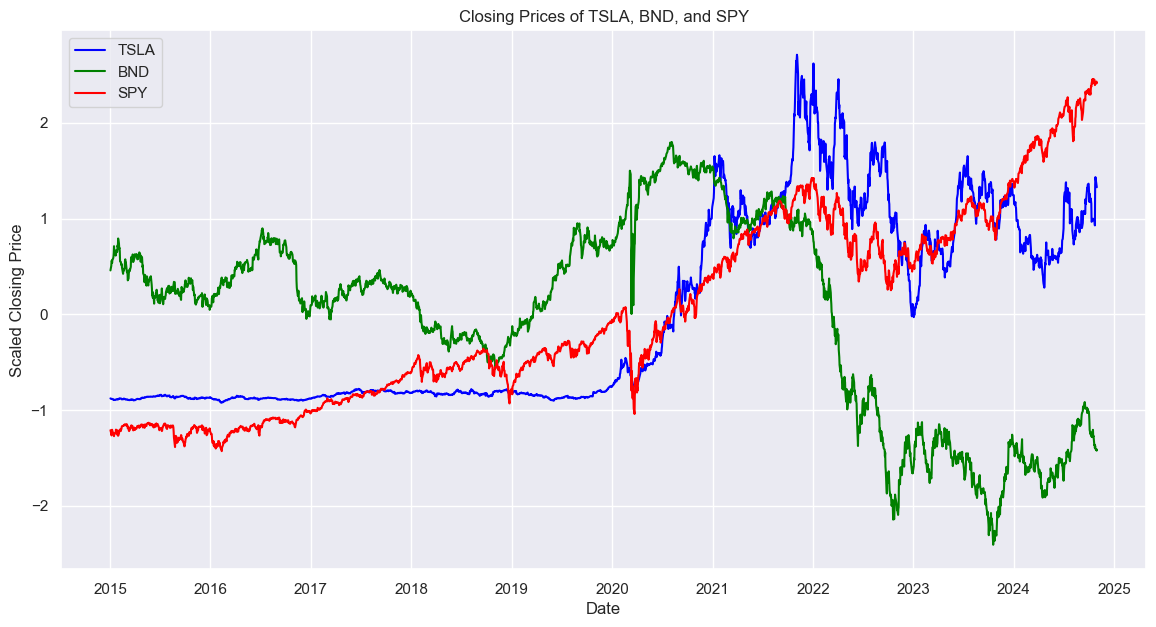

In [12]:

plt.figure(figsize=(14, 7))
plt.plot(tsla_data['Close'], label='TSLA', color='blue')
plt.plot(bnd_data['Close'], label='BND', color='green')
plt.plot(spy_data['Close'], label='SPY', color='red')
plt.title('Closing Prices of TSLA, BND, and SPY')
plt.xlabel('Date')
plt.ylabel('Scaled Closing Price')
plt.legend()
plt.show()

#### 2. Calculate and plot the daily percentage change to observe volatility

In [13]:
tsla_data['Daily Change'] = tsla_data['Close'].pct_change() * 100
bnd_data['Daily Change'] = bnd_data['Close'].pct_change() * 100
spy_data['Daily Change'] = spy_data['Close'].pct_change() * 100

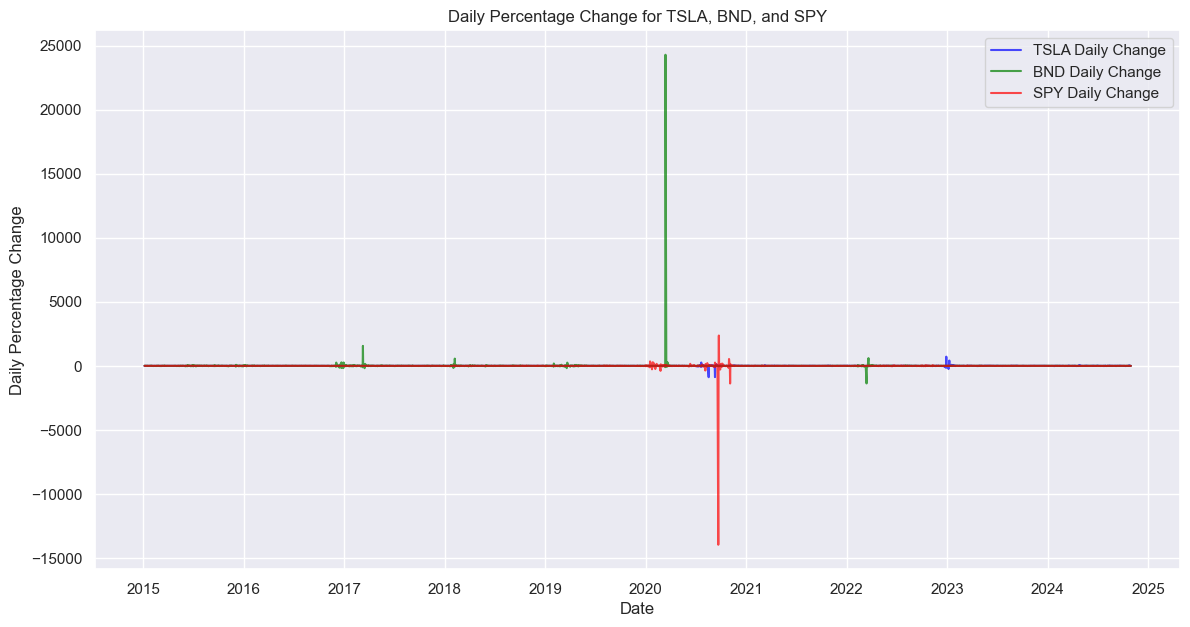

In [14]:
plt.figure(figsize=(14, 7))
plt.plot(tsla_data['Daily Change'], label='TSLA Daily Change', color='blue', alpha=0.7)
plt.plot(bnd_data['Daily Change'], label='BND Daily Change', color='green', alpha=0.7)
plt.plot(spy_data['Daily Change'], label='SPY Daily Change', color='red', alpha=0.7)
plt.title('Daily Percentage Change for TSLA, BND, and SPY')
plt.xlabel('Date')
plt.ylabel('Daily Percentage Change')
plt.legend()
plt.show()

### 3. Calculate rolling means and standard deviations to understand short-term trends


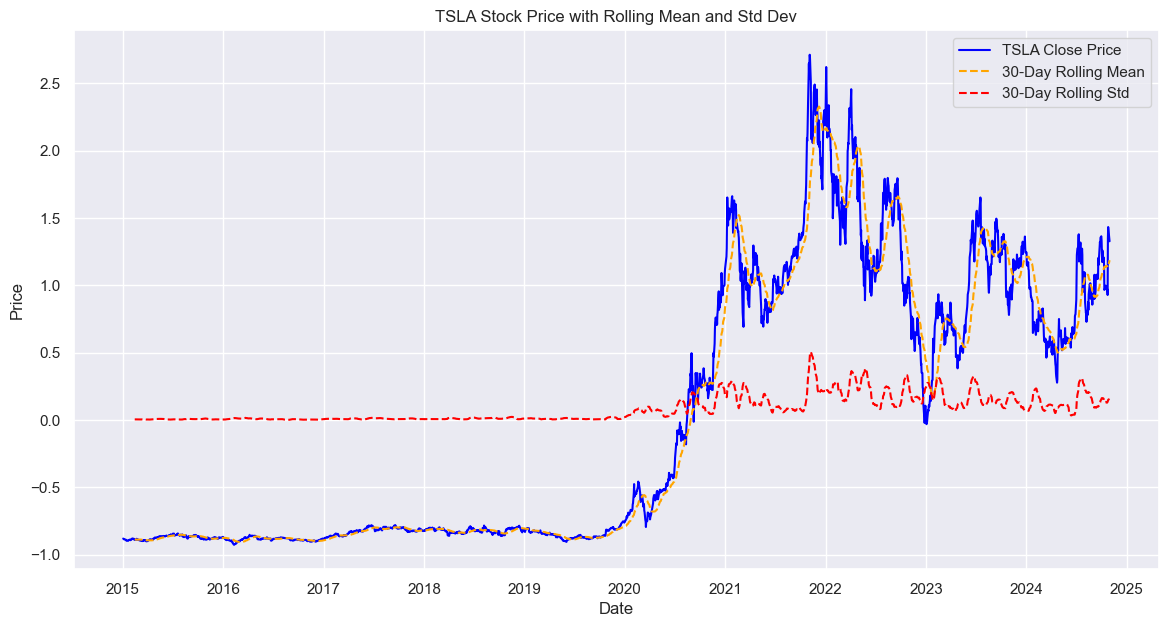

In [15]:
rolling_window = 30  # 30 days rolling window

tsla_data['Rolling Mean'] = tsla_data['Close'].rolling(window=rolling_window).mean()
tsla_data['Rolling Std'] = tsla_data['Close'].rolling(window=rolling_window).std()

bnd_data['Rolling Mean'] = bnd_data['Close'].rolling(window=rolling_window).mean()
bnd_data['Rolling Std'] = bnd_data['Close'].rolling(window=rolling_window).std()

spy_data['Rolling Mean'] = spy_data['Close'].rolling(window=rolling_window).mean()
spy_data['Rolling Std'] = spy_data['Close'].rolling(window=rolling_window).std()

# Plot rolling means and std deviations for TSLA
plt.figure(figsize=(14, 7))
plt.plot(tsla_data['Close'], label='TSLA Close Price', color='blue')
plt.plot(tsla_data['Rolling Mean'], label='30-Day Rolling Mean', color='orange', linestyle='--')
plt.plot(tsla_data['Rolling Std'], label='30-Day Rolling Std', color='red', linestyle='--')
plt.title('TSLA Stock Price with Rolling Mean and Std Dev')
plt.xlabel('Date')
plt.ylabel('Price')
plt.legend()
plt.show()

### 4. Perform Outlier Detection: Identify significant anomalies in the daily returns


In [16]:
# Define a threshold for detecting extreme changes (e.g., 5% move)
threshold = 5  # Define a threshold for extreme daily changes

outliers_tsla = tsla_data[tsla_data['Daily Change'].abs() > threshold]
outliers_bnd = bnd_data[bnd_data['Daily Change'].abs() > threshold]
outliers_spy = spy_data[spy_data['Daily Change'].abs() > threshold]

print("\nOutliers Detected in TSLA:")
print(outliers_tsla[['Daily Change']])

print("\nOutliers Detected in BND:")
print(outliers_bnd[['Daily Change']])

print("\nOutliers Detected in SPY:")
print(outliers_spy[['Daily Change']])


Outliers Detected in TSLA:
Price                     Daily Change
Ticker                                
Date                                  
2020-01-30 00:00:00+00:00    -5.485086
2020-02-03 00:00:00+00:00   -12.676607
2020-02-04 00:00:00+00:00   -12.007835
2020-02-05 00:00:00+00:00    19.420681
2020-02-18 00:00:00+00:00    -6.697225
...                                ...
2024-10-04 00:00:00+00:00     7.289833
2024-10-07 00:00:00+00:00    -6.671906
2024-10-11 00:00:00+00:00   -16.468884
2024-10-24 00:00:00+00:00    45.816990
2024-10-25 00:00:00+00:00     5.844022

[537 rows x 1 columns]

Outliers Detected in BND:
Price                     Daily Change
Ticker                                
Date                                  
2015-01-05 00:00:00+00:00    10.282849
2015-01-06 00:00:00+00:00     9.324069
2015-01-09 00:00:00+00:00     5.120747
2015-01-14 00:00:00+00:00     6.201208
2015-01-15 00:00:00+00:00    11.370842
...                                ...
2024-09-25 00:00:00+00:0

### 5. Analyze days with unusually high or low returns (based on the outliers identified)


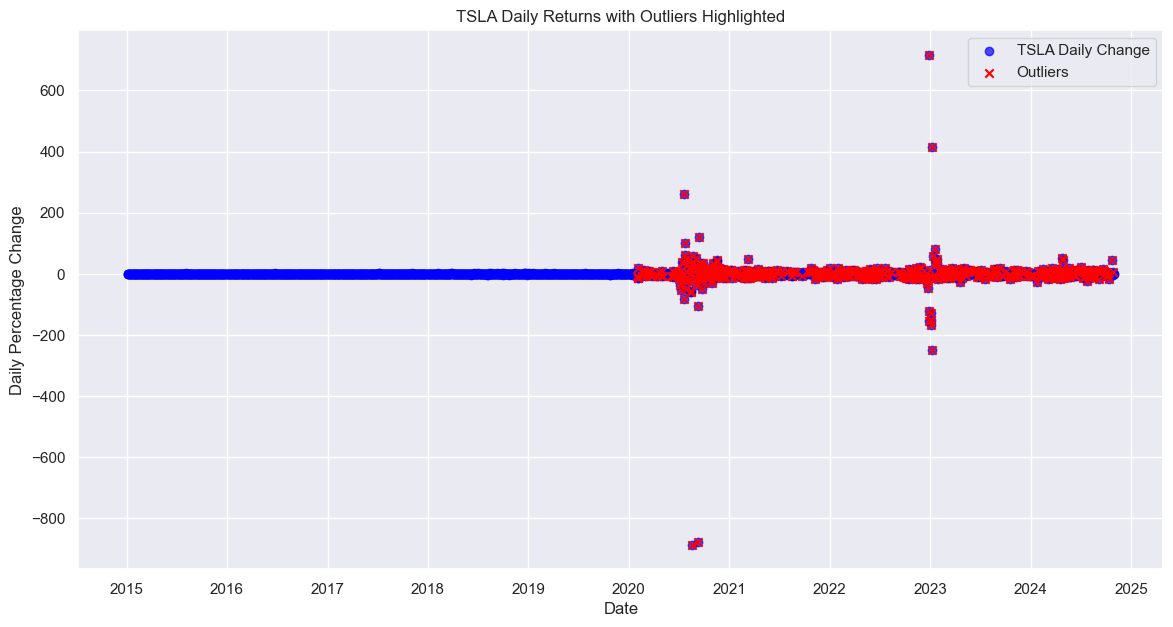

In [17]:
plt.figure(figsize=(14, 7))
plt.scatter(tsla_data.index, tsla_data['Daily Change'], color='blue', label='TSLA Daily Change', alpha=0.7)
plt.scatter(outliers_tsla.index, outliers_tsla['Daily Change'], color='red', label='Outliers', marker='x')
plt.title('TSLA Daily Returns with Outliers Highlighted')
plt.xlabel('Date')
plt.ylabel('Daily Percentage Change')
plt.legend()
plt.show()

### 6. Perform Seasonal Decomposition: Decompose the time series for TSLA to identify trend, seasonality, and residuals


<Figure size 1400x1000 with 0 Axes>

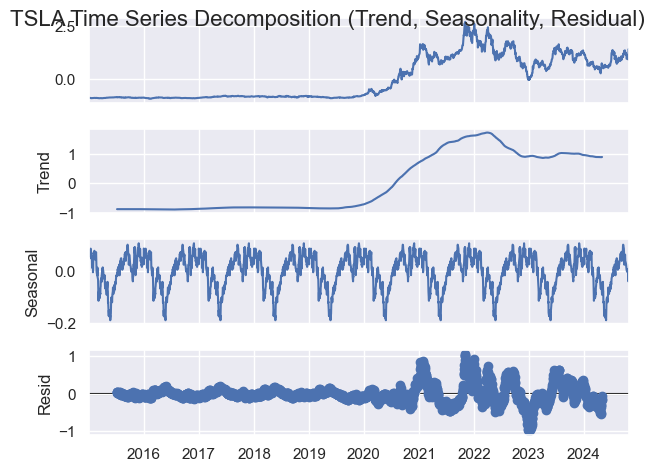

In [18]:
from statsmodels.tsa.seasonal import seasonal_decompose
import matplotlib.pyplot as plt

# Extract the 'Close' column from the data
tsla_close = tsla_data[['Close']]

# Check for any zero or negative values
if (tsla_close <= 0).any().any():
    print("Warning: Data contains zero or negative values. Switching to additive model.")
    # Decompose the data using the additive model (if there are non-positive values)
    tsla_decomp = seasonal_decompose(tsla_close, model='additive', period=252)
else:
    # Decompose the data using the multiplicative model (if data is positive)
    tsla_decomp = seasonal_decompose(tsla_close, model='multiplicative', period=252)

# Plot the decomposed components
plt.figure(figsize=(14, 10))
tsla_decomp.plot()
plt.suptitle('TSLA Time Series Decomposition (Trend, Seasonality, Residual)', fontsize=16)
plt.show()


# 7. Volatility Analysis (Rolling Mean and Standard Deviation)


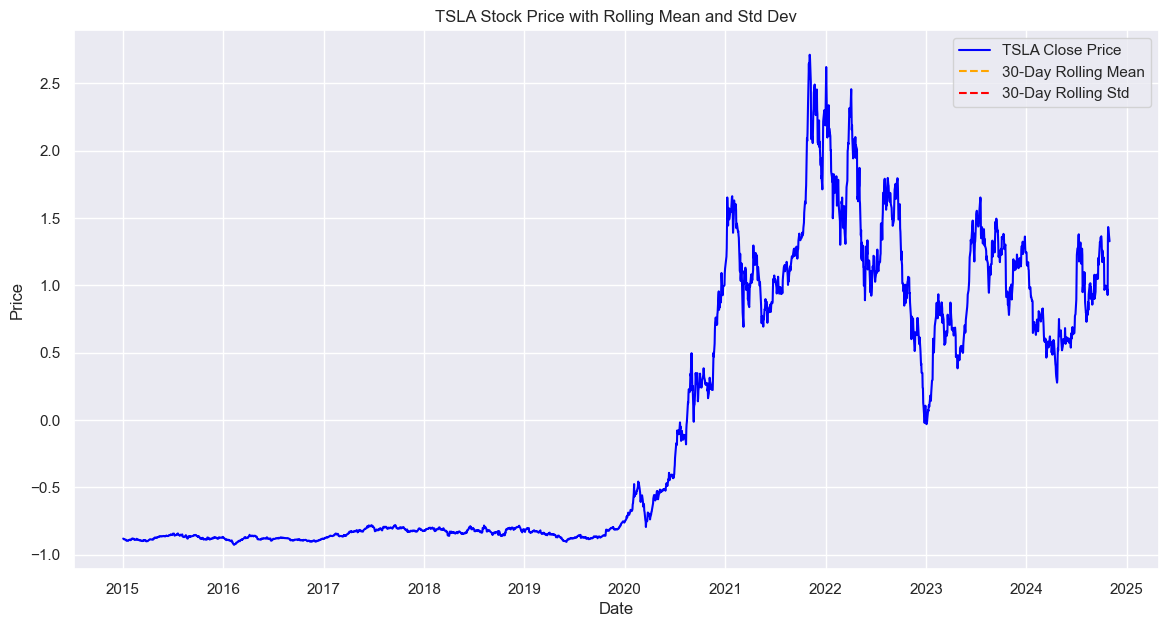

In [19]:
rolling_window = 30  # 30 days rolling window

tsla_data['Rolling Mean'] = tsla_data['Close'].rolling(window=rolling_window).mean()
tsla_data['Rolling Std'] = tsla_data['Close'].rolling(window=rolling_window).std()

plt.figure(figsize=(14, 7))
plt.plot(tsla_data['Close'], label='TSLA Close Price', color='blue')
plt.plot(tsla_data['Rolling Mean'], label='30-Day Rolling Mean', color='orange', linestyle='--')
plt.plot(tsla_data['Rolling Std'], label='30-Day Rolling Std', color='red', linestyle='--')
plt.title('TSLA Stock Price with Rolling Mean and Std Dev')
plt.xlabel('Date')
plt.ylabel('Price')
plt.legend()
plt.show()

# 8. Calculate Value at Risk (VaR) and Sharpe Ratio
### Value at Risk (VaR) at a 95% confidence level


In [20]:
VaR_95 = tsla_data['Daily Change'].quantile(0.05)
print(f"\nTSLA 95% Value at Risk (VaR): {VaR_95}%")


TSLA 95% Value at Risk (VaR): -9.277858527614367%


In [21]:
# Sharpe Ratio (Assume risk-free rate = 0 for simplicity)
average_return = tsla_data['Daily Change'].mean()
std_dev = tsla_data['Daily Change'].std()
sharpe_ratio = average_return / std_dev
print(f"TSLA Sharpe Ratio: {sharpe_ratio}")

TSLA Sharpe Ratio: -0.008822778976353841
